In [1]:
import graph_examples as examples
    import triconnected_components as tcc 
import printers 
import networkx as nx
import matplotlib.pyplot as plt
graph_examples = examples.GraphExamples.get_examples()
### TODO SIEMPRE PILLA EL GRAFO GRANDE
triconnected_graph, parent_g = examples.GraphExamples.extract_triconnected_subgraph(n=20, seed=0)
graph_examples.append(triconnected_graph)
finder = tcc.TriconnectedFinder()
printer = printers.ConnectedComponentsDrawer()

frozenset({0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 16, 17, 18, 19})


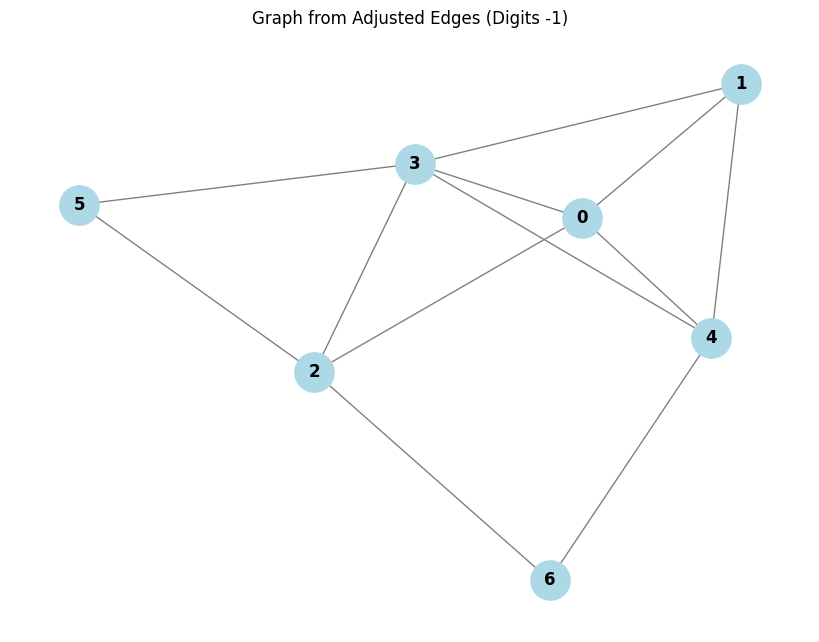

In [2]:
edges = [
            (0, 1), (0, 2), (0, 3), (0, 4), 
            (1, 3), (1, 4),
            (2, 3), (2, 5), (2, 6),
            (3, 4), (3, 5),# (3, 7),
            (4, 6),# (4, 7),
        ]
        
# Create the graph that fails in triconnected components
bad_graph = nx.Graph()
bad_graph.add_edges_from(edges)
graph_examples.append(bad_graph)


# Draw the graph
pos = nx.spring_layout(bad_graph, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(
    bad_graph, pos, with_labels=True,
    node_color="lightblue", node_size=800,
    edge_color="gray", font_weight="bold"
)
plt.title("Graph from Adjusted Edges (Digits -1)")
plt.show()

In [3]:
### FIND TRICONNECTED COMPONENTS OF G ###

results = finder.triconnected_comps(bad_graph)
names = ["TCCs", "all_relation_T", "all_relation_R", "all_connected_components", "all_sep_pairs"]
for i, name in enumerate(names):
    print()
    print(name)
    print(results[i])



TCCs
[frozenset({2, 4, 6}), frozenset({2, 3, 5}), frozenset({0, 1, 2, 3, 4})]

all_relation_T
[[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 3), (0, 2, 4), (0, 3, 4), (1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4), (2, 3, 5), (2, 4, 6)]]

all_relation_R
[[[True, True, True, True, True, False, False], [True, True, True, True, True, False, False], [True, True, True, True, True, True, True], [True, True, True, True, True, True, False], [True, True, True, True, True, False, True], [False, False, True, True, False, True, False], [False, False, True, False, True, False, True]]]

all_connected_components
[{(2, 3): {0: 0, 1: 0, 4: 0, 6: 0, 5: 1}, (2, 4): {0: 0, 1: 0, 3: 0, 5: 0, 6: 1}}]

all_sep_pairs
[[(2, 3), (2, 4)]]


In [4]:
### FIND TRICONNECTED COMPONENTS OF parent_g ###

results = finder.triconnected_comps(bad_graph)
names = ["TCCs", "all_relation_T", "all_relation_R", "all_connected_components", "all_sep_pairs"]
for i, name in enumerate(names):
    print()
    print(name)
    if i == 2:
        matrix = results[i][0]
        
        # Print header row with aligned column indexes
        header = "     " + " ".join(f"{col:>2}" for col in range(len(matrix[0])))
        print(header)
        print("    " + "-" * (3 * len(matrix[0])))
        
        # Print rows with index and aligned values
        for i, row in enumerate(matrix):
            row_str = f"{i:>2} | " + " ".join(" 1" if val else " 0" for val in row)
            print(row_str)
    else:
        print(results[i])



TCCs
[frozenset({2, 4, 6}), frozenset({2, 3, 5}), frozenset({0, 1, 2, 3, 4})]

all_relation_T
[[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 3), (0, 2, 4), (0, 3, 4), (1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4), (2, 3, 5), (2, 4, 6)]]

all_relation_R
      0  1  2  3  4  5  6
    ---------------------
 0 |  1  1  1  1  1  0  0
 1 |  1  1  1  1  1  0  0
 2 |  1  1  1  1  1  1  1
 3 |  1  1  1  1  1  1  0
 4 |  1  1  1  1  1  0  1
 5 |  0  0  1  1  0  1  0
 6 |  0  0  1  0  1  0  1

all_connected_components
[{(2, 3): {0: 0, 1: 0, 4: 0, 6: 0, 5: 1}, (2, 4): {0: 0, 1: 0, 3: 0, 5: 0, 6: 1}}]

all_sep_pairs
[[(2, 3), (2, 4)]]


In [5]:
### FIND TRICONNECTED COMPONENTS OF parent_g ###

results = finder.triconnected_comps(parent_g)
names = ["TCCs", "all_relation_T", "all_relation_R", "all_connected_components", "all_sep_pairs"]
for i, name in enumerate(names):
    print()
    print(name)
    if i == 2:
        matrix = results[i][0]
        
        # Print header row with aligned column indexes
        header = "     " + " ".join(f"{col:>2}" for col in range(len(matrix[0])))
        print(header)
        print("    " + "-" * (3 * len(matrix[0])))
        
        # Print rows with index and aligned values
        for i, row in enumerate(matrix):
            row_str = f"{i:>2} | " + " ".join(" 1" if val else " 0" for val in row)
            print(row_str)
    else:
        print(results[i])



TCCs
[frozenset({0, 19, 14}), frozenset({2, 12, 5}), frozenset({0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 16, 17, 18, 19}), frozenset({9, 17, 15}), frozenset({11, 12, 6})]

all_relation_T
[[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 6), (0, 1, 7), (0, 1, 8), (0, 1, 9), (0, 1, 10), (0, 1, 12), (0, 1, 16), (0, 1, 17), (0, 1, 18), (0, 1, 19), (0, 2, 3), (0, 2, 4), (0, 2, 6), (0, 2, 7), (0, 2, 8), (0, 2, 9), (0, 2, 10), (0, 2, 12), (0, 2, 16), (0, 2, 17), (0, 2, 18), (0, 2, 19), (0, 3, 4), (0, 3, 6), (0, 3, 7), (0, 3, 8), (0, 3, 9), (0, 3, 10), (0, 3, 12), (0, 3, 16), (0, 3, 17), (0, 3, 18), (0, 3, 19), (0, 4, 6), (0, 4, 7), (0, 4, 8), (0, 4, 9), (0, 4, 10), (0, 4, 12), (0, 4, 16), (0, 4, 17), (0, 4, 18), (0, 4, 19), (0, 6, 7), (0, 6, 8), (0, 6, 9), (0, 6, 10), (0, 6, 12), (0, 6, 16), (0, 6, 17), (0, 6, 18), (0, 6, 19), (0, 7, 8), (0, 7, 9), (0, 7, 10), (0, 7, 12), (0, 7, 16), (0, 7, 17), (0, 7, 18), (0, 7, 19), (0, 8, 9), (0, 8, 10), (0, 8, 12), (0, 8, 16), (0, 8, 17), (0, 8, 18), (0, 8, 19), (0, 

[(0, 1), (0, 9), (0, 10), (0, 14), (1, 2), (1, 3), (1, 9), (1, 18), (2, 5), (2, 8), (3, 6), (3, 10), (4, 6), (4, 7), (4, 12), (5, 12), (6, 8), (6, 11), (7, 8), (7, 10), (7, 19), (8, 9), (8, 10), (8, 13), (8, 16), (8, 17), (8, 19), (9, 15), (9, 18), (9, 19), (10, 16), (10, 17), (10, 18), (11, 12), (12, 19), (14, 19), (15, 17), (16, 18)]


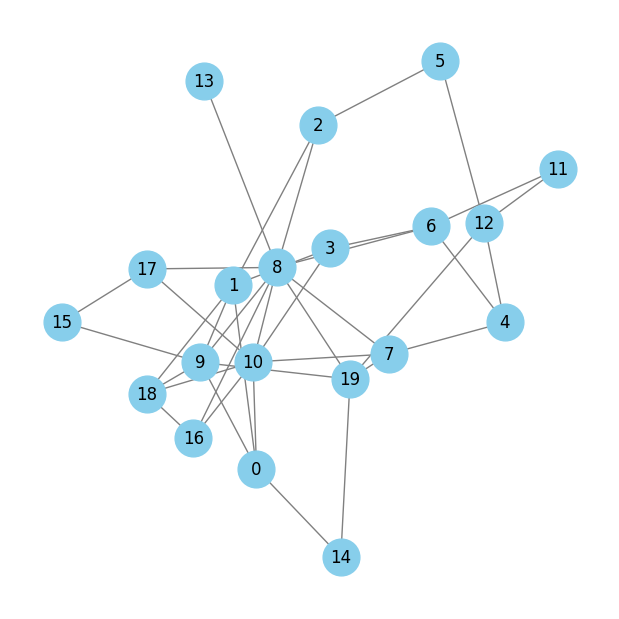

In [6]:
# Draw the graph
print(parent_g.edges)
plt.figure(figsize=(6, 6))
nx.draw(parent_g, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show(parent_g)

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 16, 17, 18, 19]
[(0, 1), (0, 9), (0, 10), (1, 2), (1, 3), (1, 9), (1, 18), (2, 8), (3, 6), (3, 10), (4, 6), (4, 7), (4, 12), (6, 8), (7, 8), (7, 10), (7, 19), (8, 9), (8, 10), (8, 16), (8, 17), (8, 19), (9, 18), (9, 19), (10, 16), (10, 17), (10, 18), (12, 19), (16, 18)]


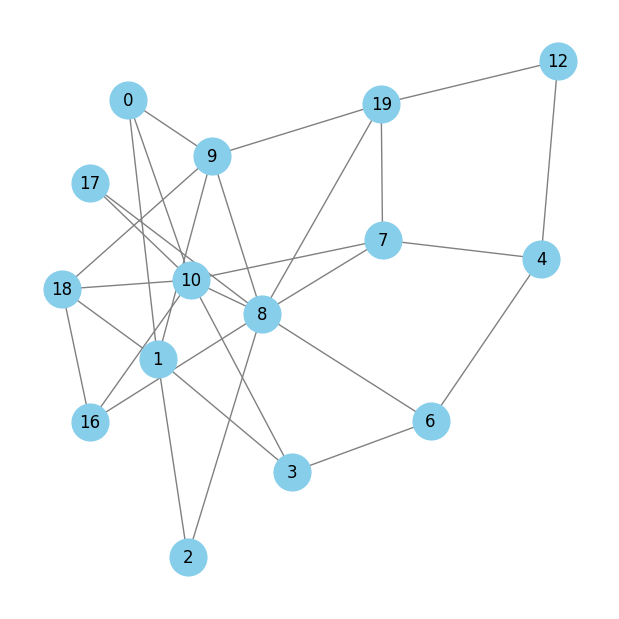

In [7]:
# Draw the graph
print(triconnected_graph.nodes)
print(triconnected_graph.edges)
plt.figure(figsize=(6, 6))
nx.draw(triconnected_graph, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

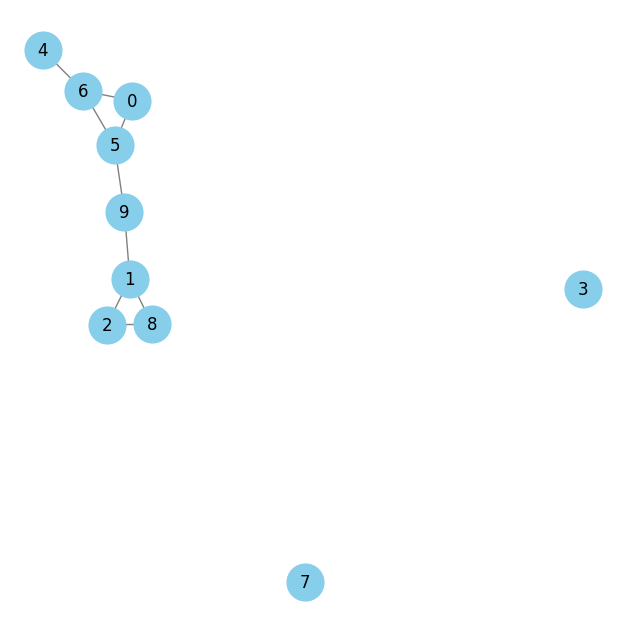

In [8]:
### CREATE A RANDOM GRAPH G ###

import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 10 # Number of nodes
p = 0.2 # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
# while not nx.is_connected(G):
#     G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

In [9]:
### FIND TRICONNECTED COMPONENTS OF G ###

results = finder.triconnected_comps(G)
names = ["TCCs", "all_relation_T", "all_relation_R", "all_connected_components", "all_sep_pairs"]
for i, name in enumerate(names):
    print()
    print(name)
    print(results[i])



TCCs
[frozenset({8, 1, 2}), frozenset({0, 5, 6})]

all_relation_T
[[(8, 1, 2)], [(0, 5, 6)]]

all_relation_R
[[[True, True, True], [True, True, True], [True, True, True]], [[True, True, True], [True, True, True], [True, True, True]]]

all_connected_components
[{}, {}]

all_sep_pairs
[[], []]


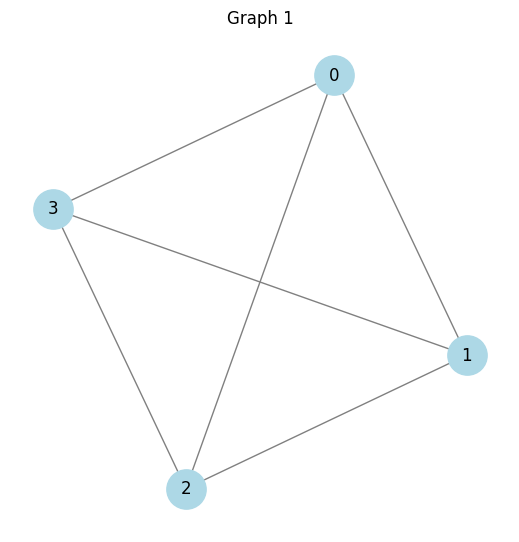

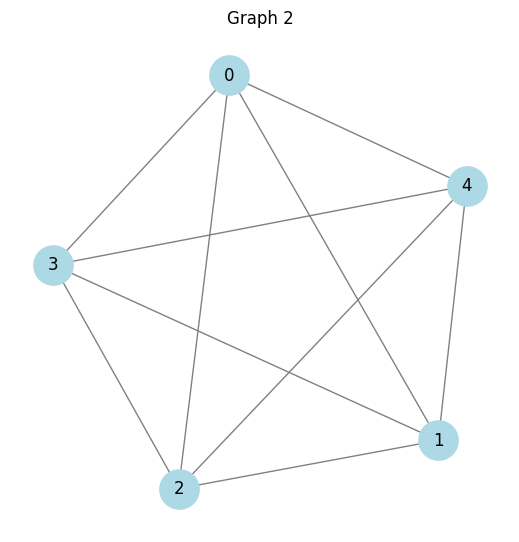

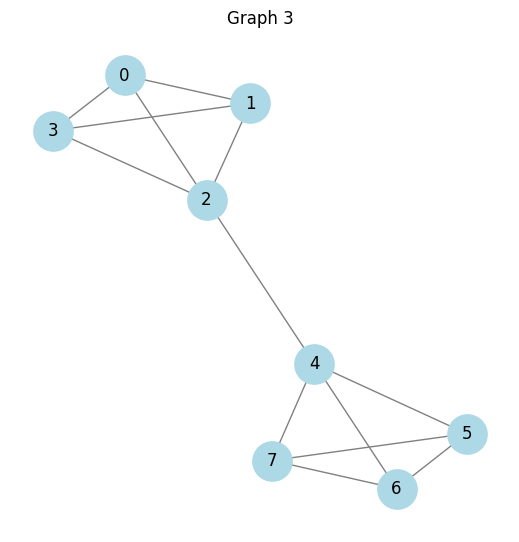

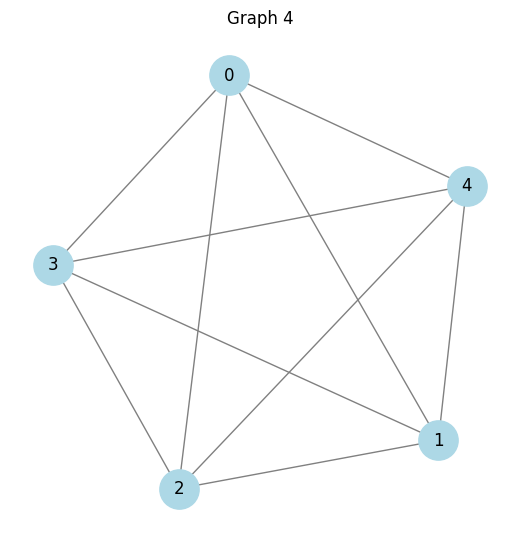

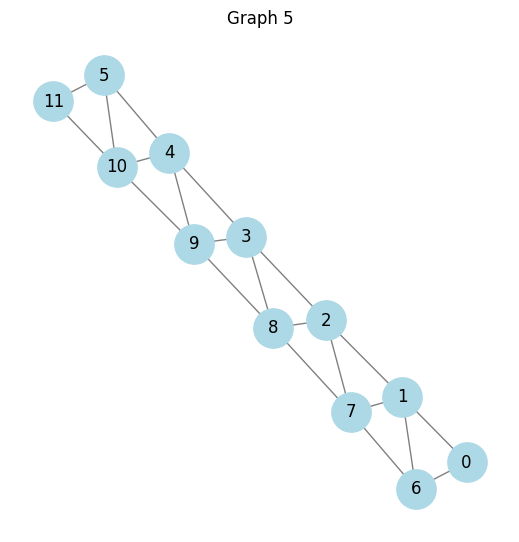

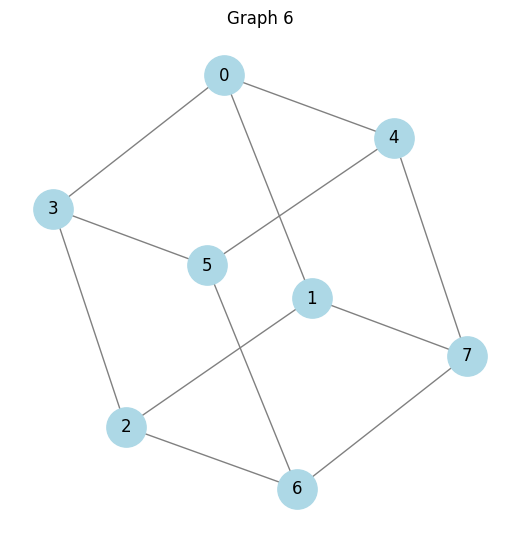

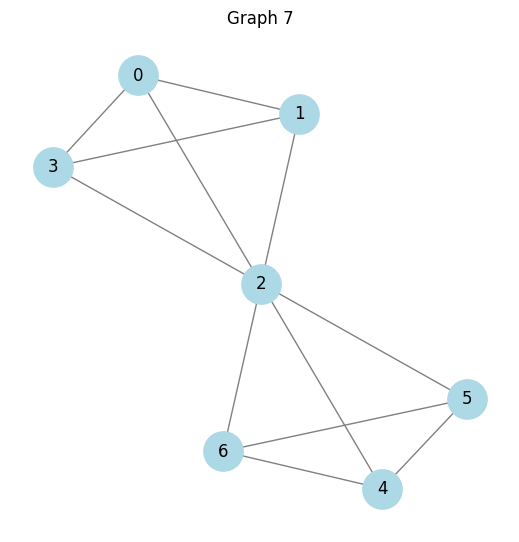

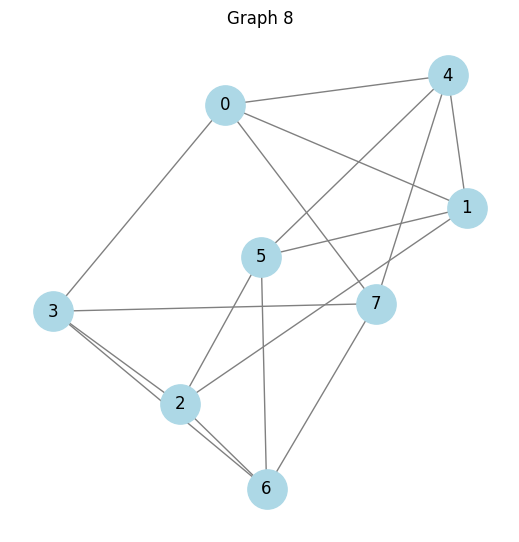

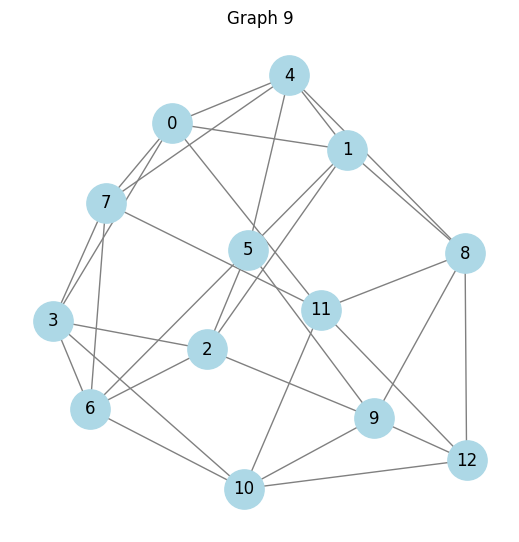

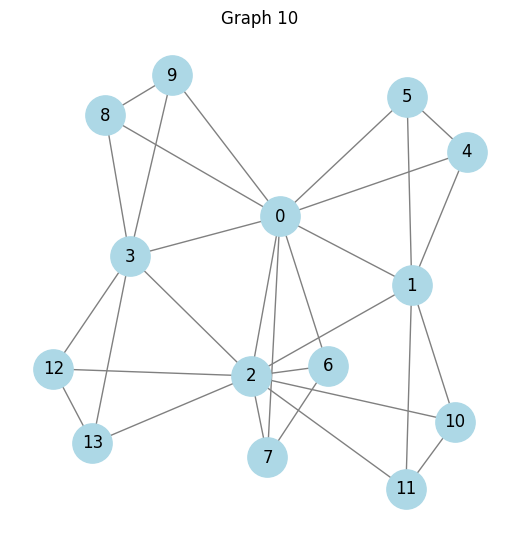

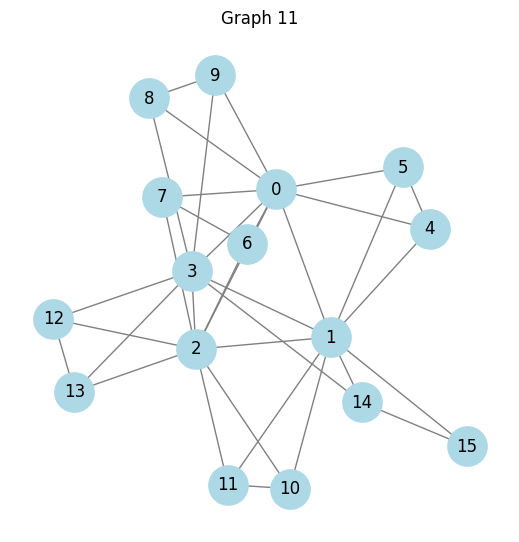

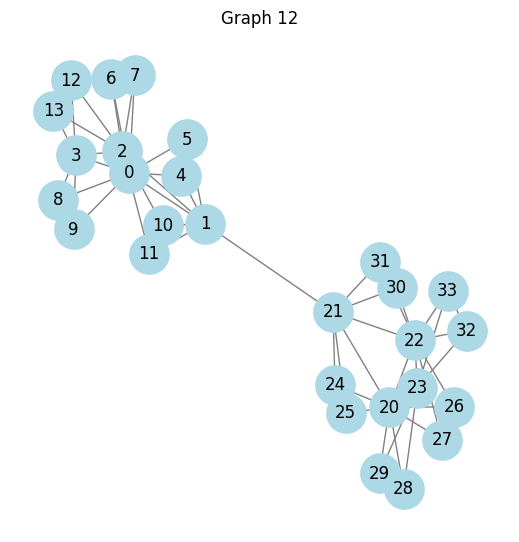

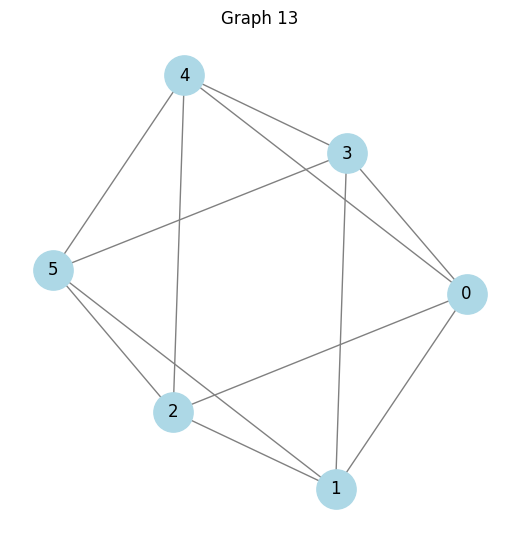

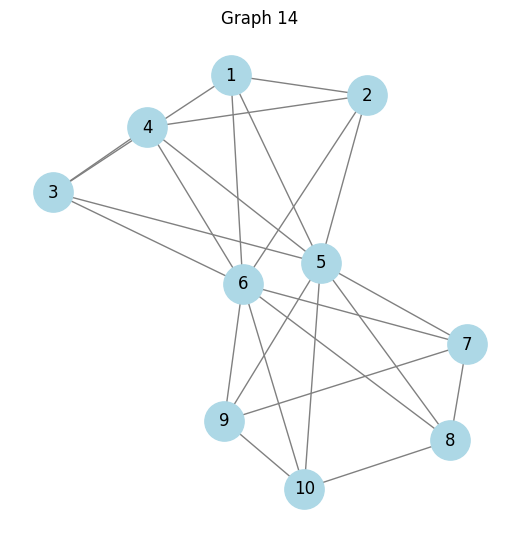

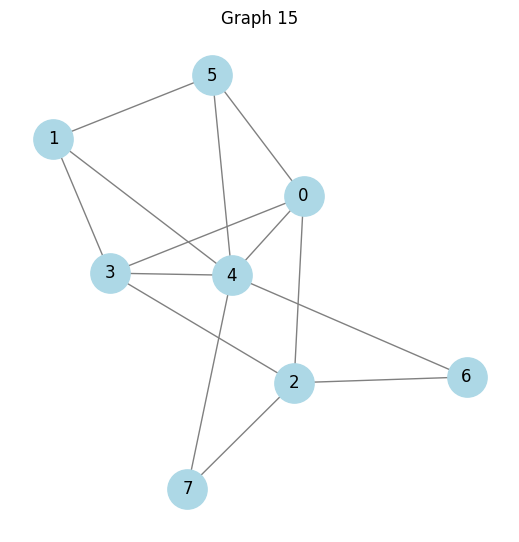

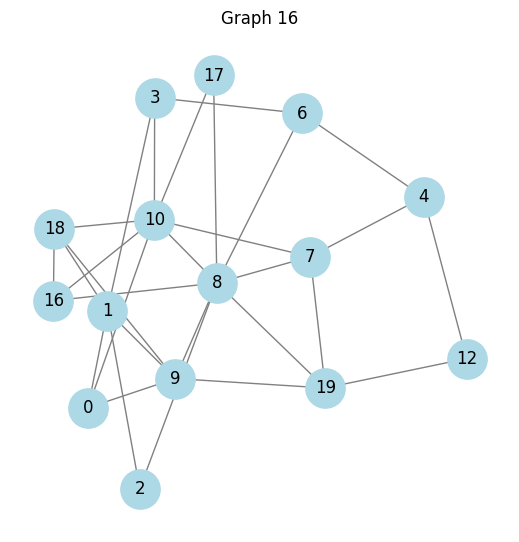

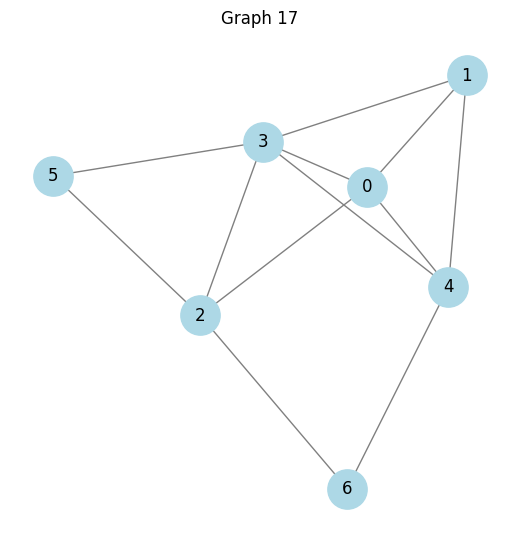

In [10]:
### DRAW GRAPH EXAMPLES ###

import matplotlib.pyplot as plt

def draw_graph(G, title):
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G, seed=42)  # Positions for nodes
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=12)
    plt.title(title)
    plt.show()

# Iterate over the graphs and draw them
for i, G in enumerate(graph_examples):
    draw_graph(G, f"Graph {i+1}")

Graph  1  Biconnected Components:


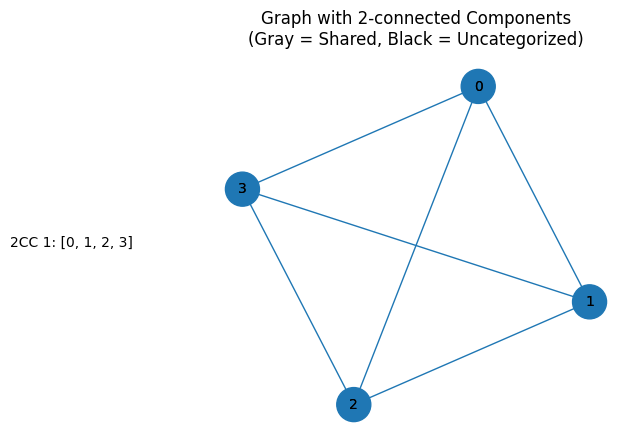

Graph  1  Triconnected Components:


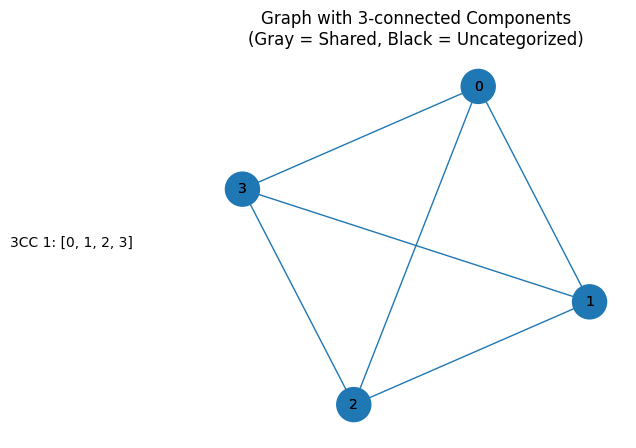

Graph  2  Biconnected Components:


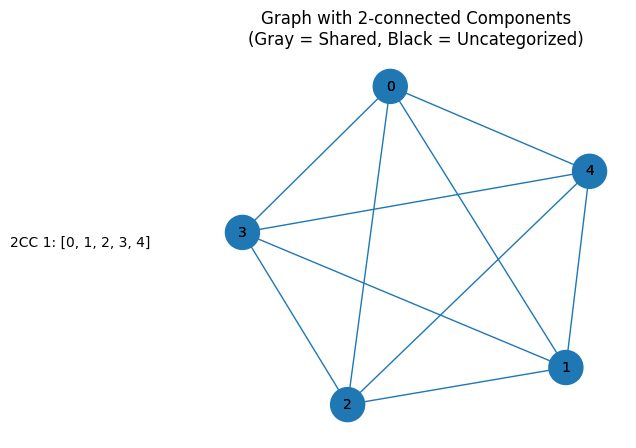

Graph  2  Triconnected Components:


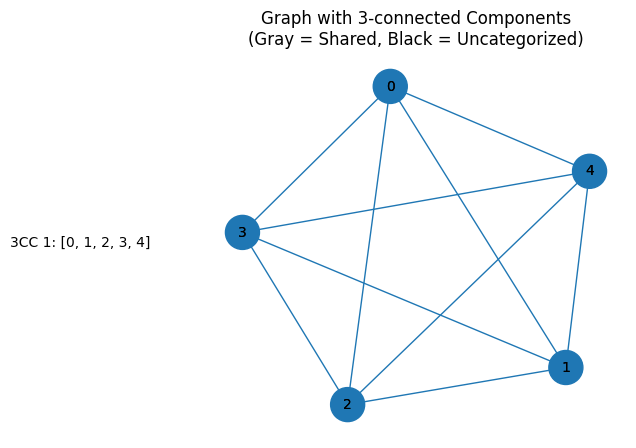

Graph  3  Biconnected Components:


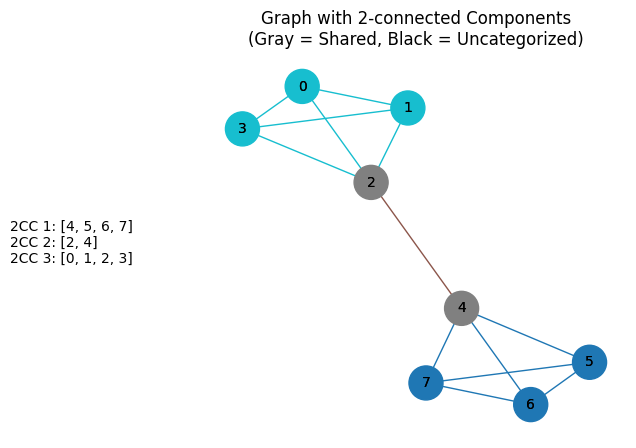

Graph  3  Triconnected Components:


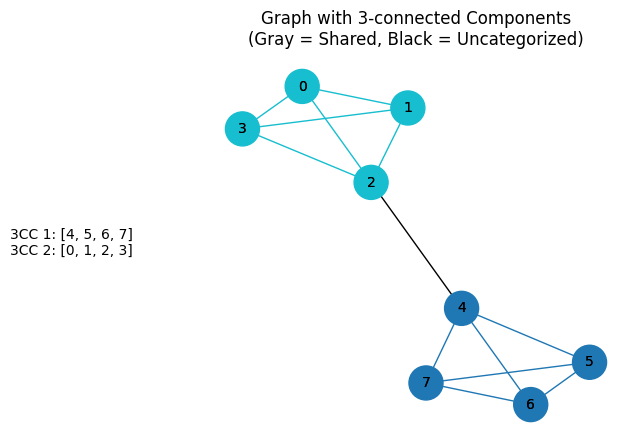

Graph  4  Biconnected Components:


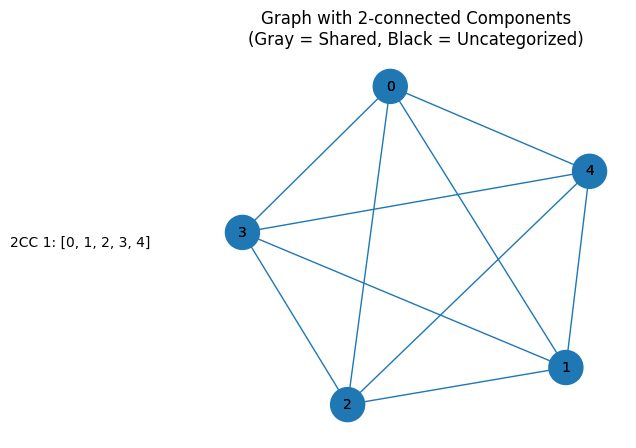

Graph  4  Triconnected Components:


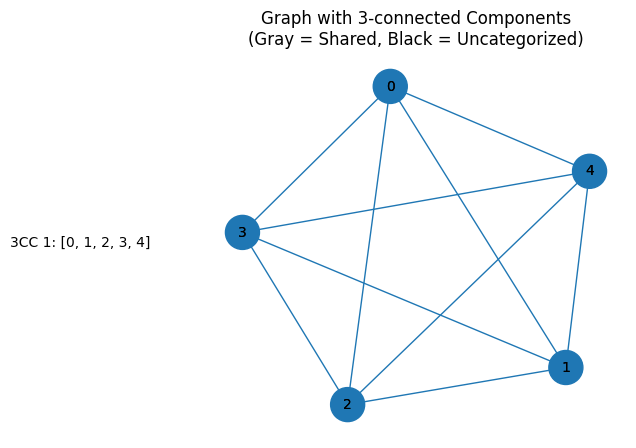

Graph  5  Biconnected Components:


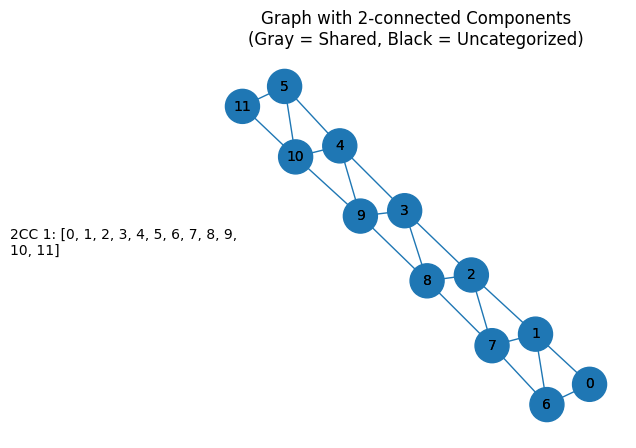

Graph  5  Triconnected Components:


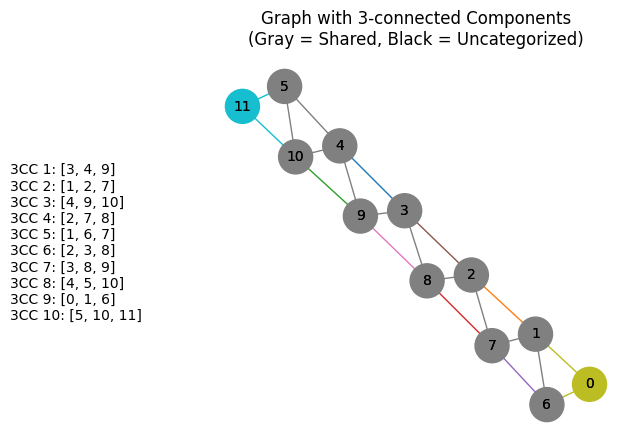

Graph  6  Biconnected Components:


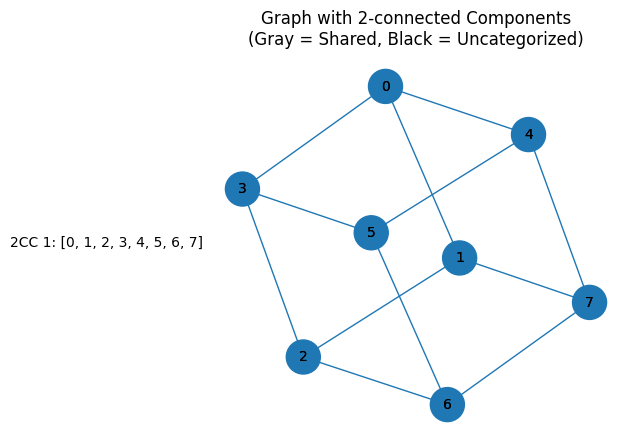

Graph  6  Triconnected Components:


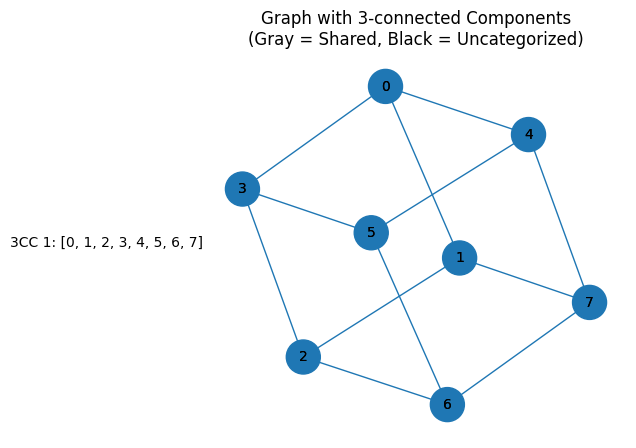

Graph  7  Biconnected Components:


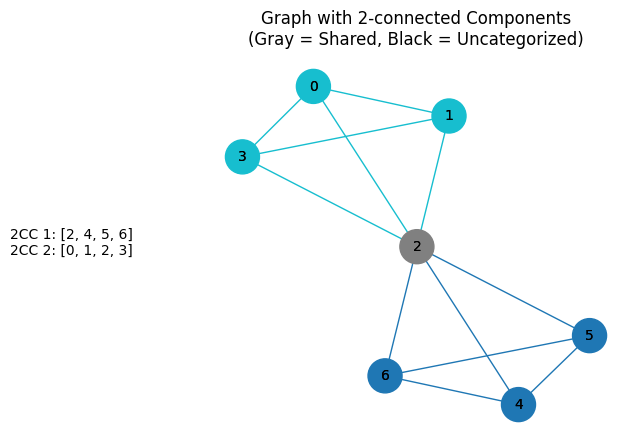

Graph  7  Triconnected Components:


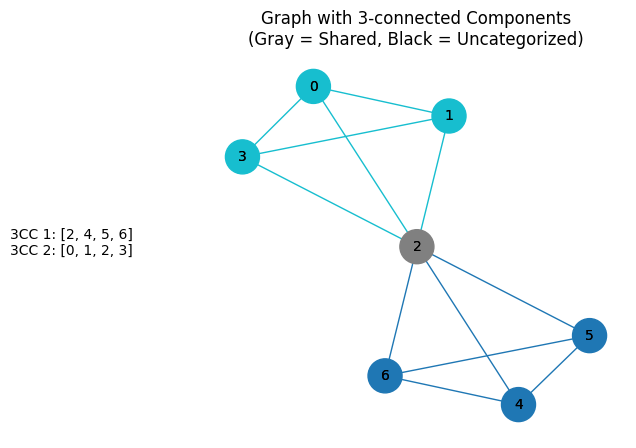

Graph  8  Biconnected Components:


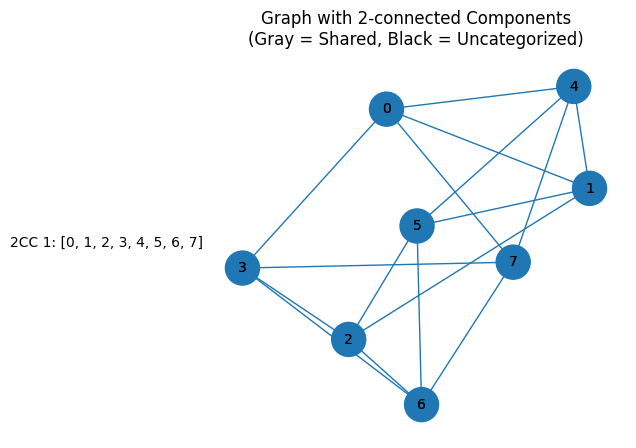

Graph  8  Triconnected Components:


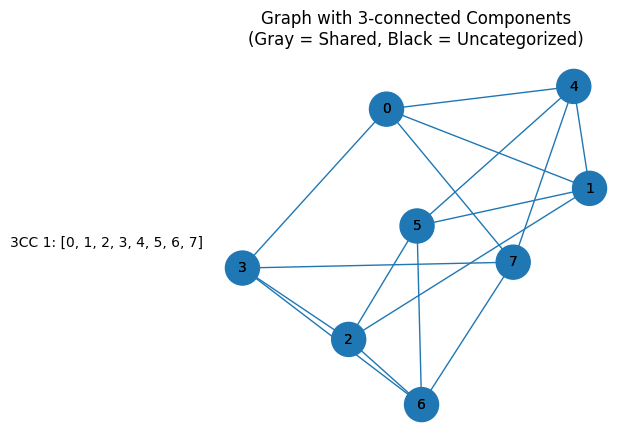

Graph  9  Biconnected Components:


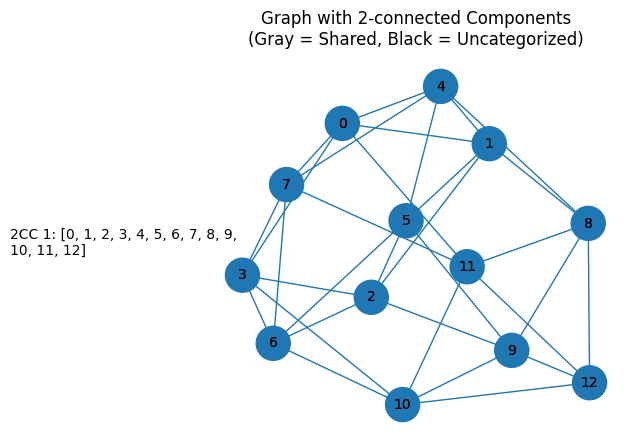

Graph  9  Triconnected Components:


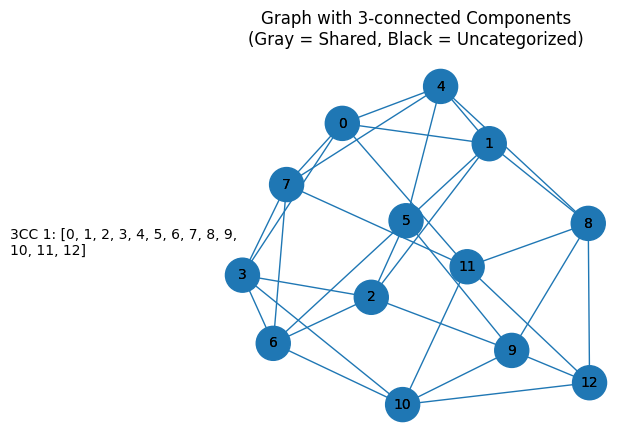

Graph  10  Biconnected Components:


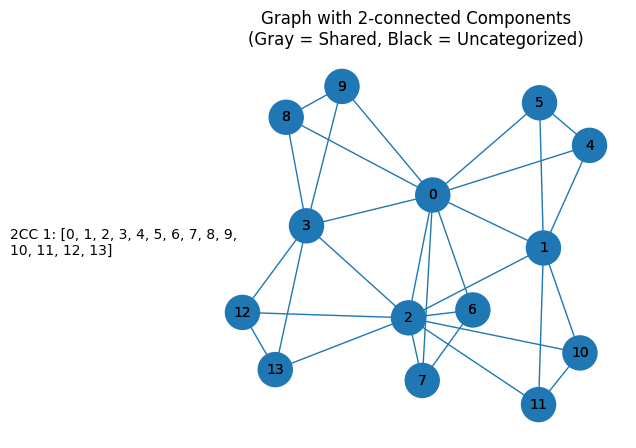

Graph  10  Triconnected Components:


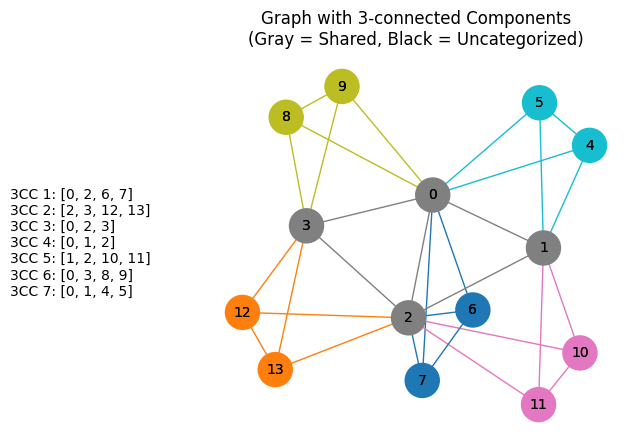

Graph  11  Biconnected Components:


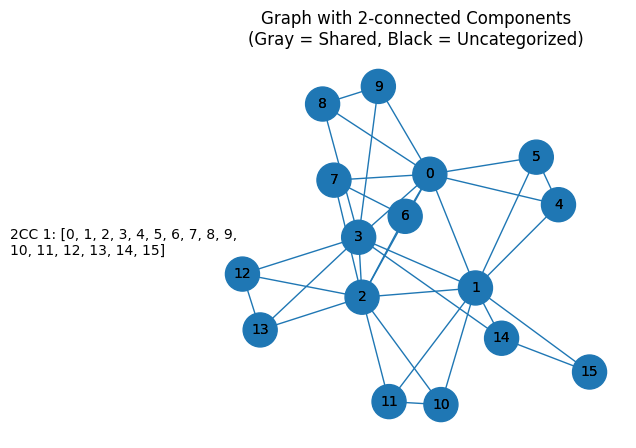

Graph  11  Triconnected Components:


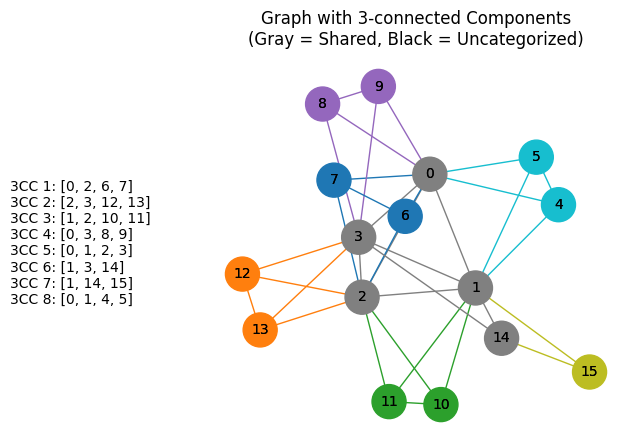

Graph  12  Biconnected Components:


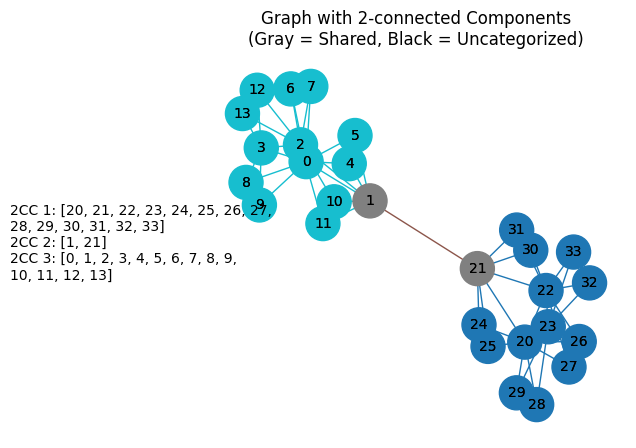

Graph  12  Triconnected Components:


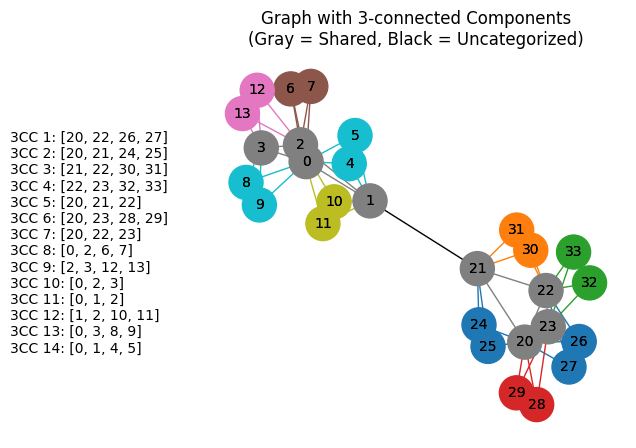

Graph  13  Biconnected Components:


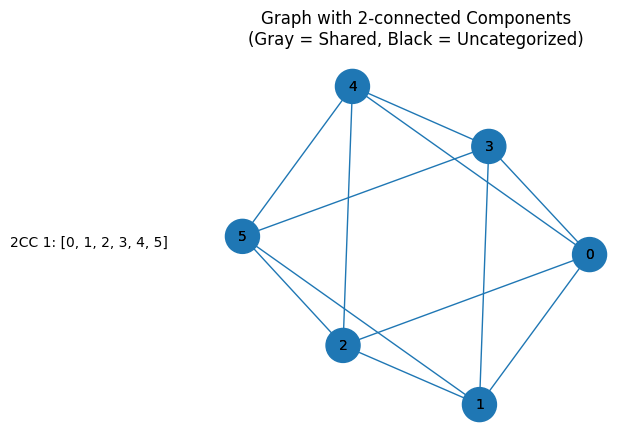

Graph  13  Triconnected Components:


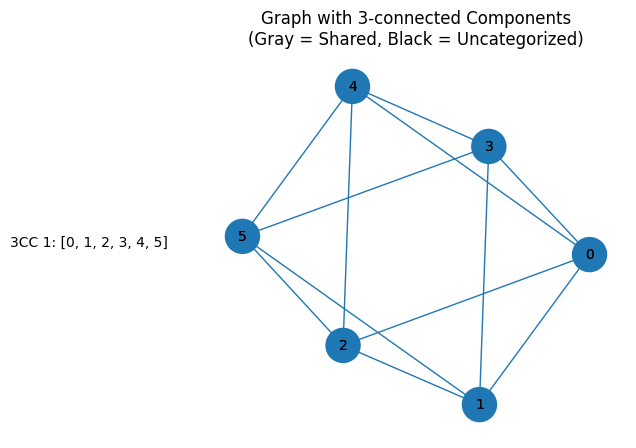

Graph  14  Biconnected Components:


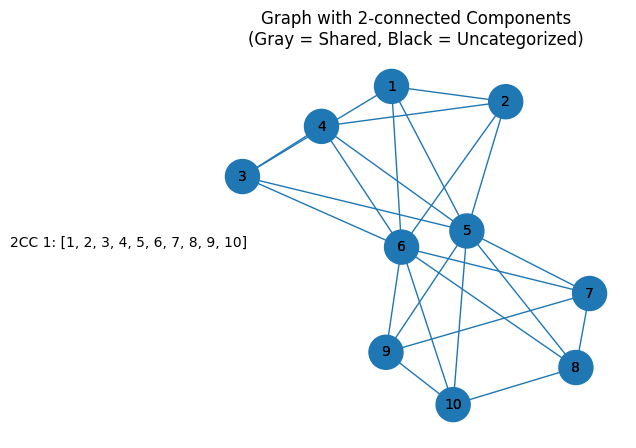

Graph  14  Triconnected Components:


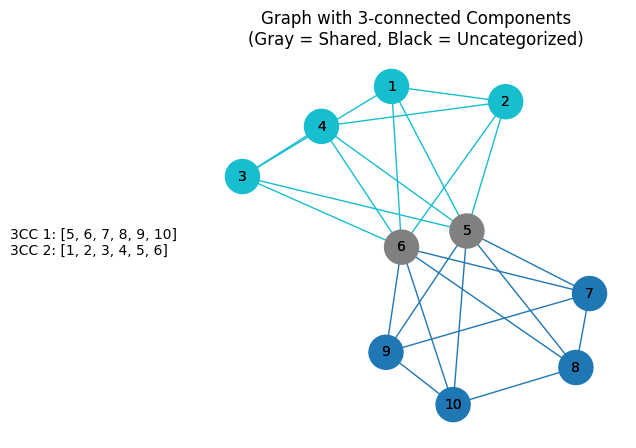

Graph  15  Biconnected Components:


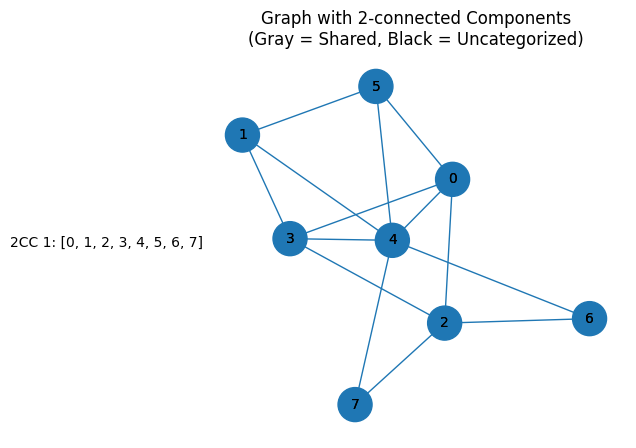

Graph  15  Triconnected Components:


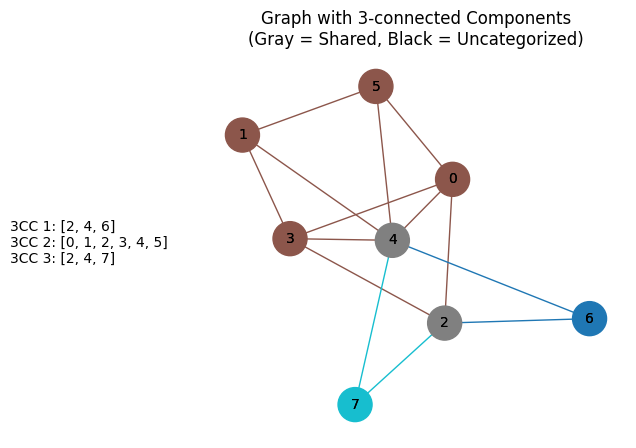

Graph  16  Biconnected Components:


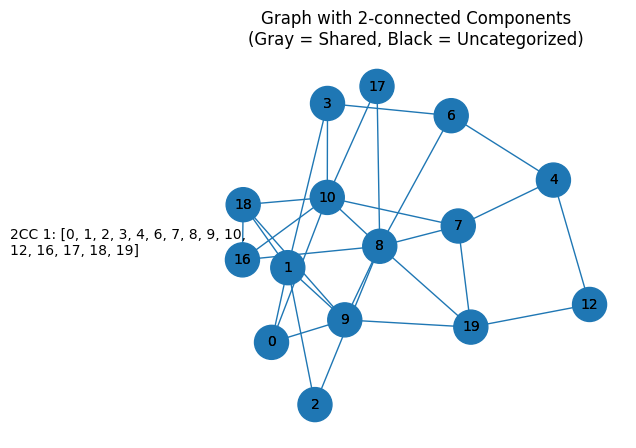

Graph  16  Triconnected Components:


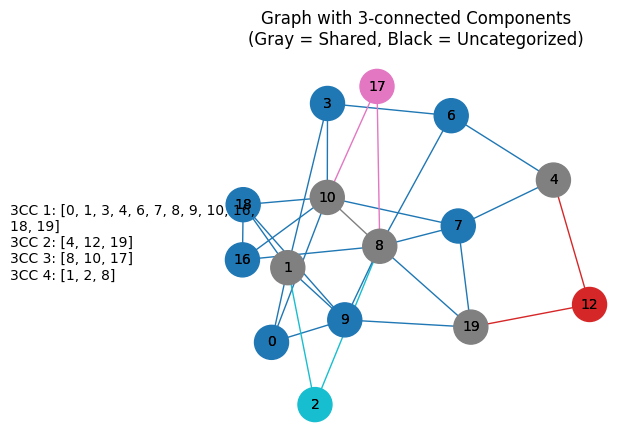

Graph  17  Biconnected Components:


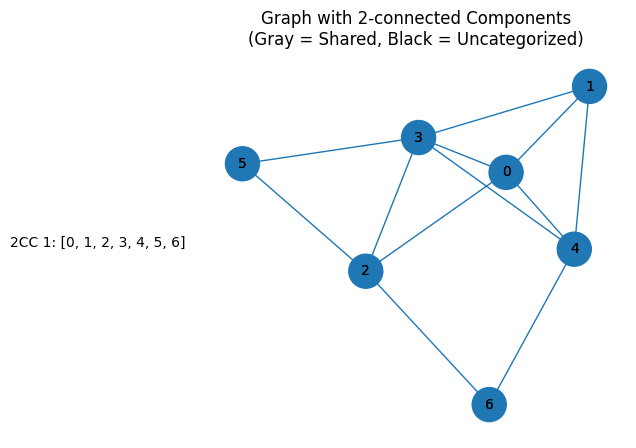

Graph  17  Triconnected Components:


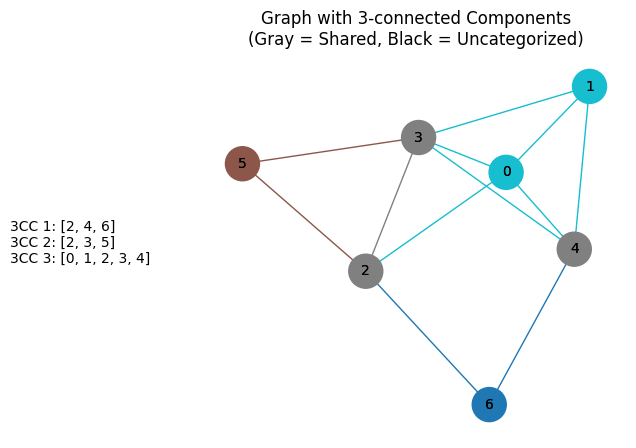

In [11]:
### FIND AND PRINT TRICONNECTED COMPONENTS ###

all_TCCs = [finder.triconnected_comps(G)[0] for G in graph_examples]

for i, (graph_ex, TCC_ex) in enumerate(zip(graph_examples, all_TCCs)):
    # Get biconnected components (as sets of edges)
    bicomponents = list(nx.biconnected_components(graph_ex))

    # Convert each component into a subgraph
    bi_subgraphs = [graph_ex.subgraph(component).copy() for component in bicomponents]

    print("Graph ", i + 1, " Biconnected Components:")
    printer.print_n_connected_components(graph_ex, bi_subgraphs, N=2)
    
    print("Graph ", i + 1, " Triconnected Components:")
    printer.print_n_connected_components(graph_ex, TCC_ex, N=3)